In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
sns.set_theme(style='whitegrid')

In [3]:
# Carregando dados históricos do BTC-USD
btc_data = pd.read_csv('../src/api/BTC-USD_historical_data.csv')

btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


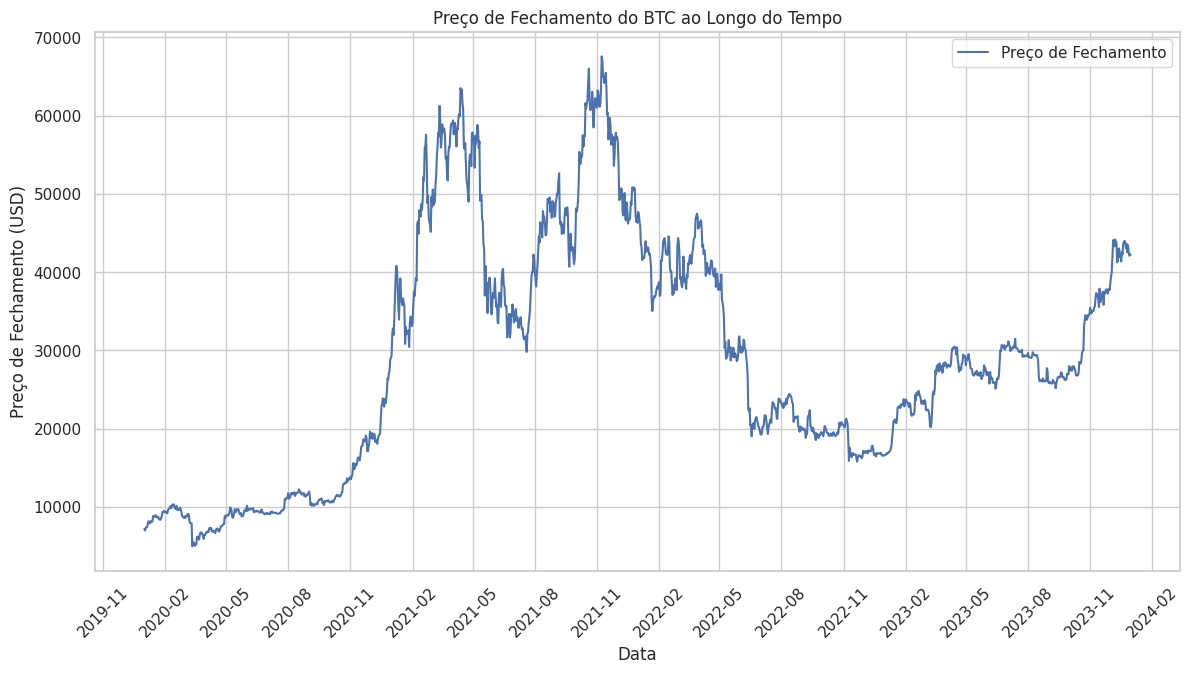

In [19]:
# Converter a coluna 'Date' para o tipo datetime
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

plt.figure(figsize=(14, 7))
plt.plot(btc_data['Date'], btc_data['Close'], label='Preço de Fechamento')

# Rotacionar os rótulos das datas
plt.xticks(rotation=45)

# Definir o formato da data para exibição
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Mostrar rótulos a cada 3 meses
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formatar rótulo como 'Ano-Mês'

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.title('Preço de Fechamento do BTC ao Longo do Tempo')
plt.legend()
plt.show()

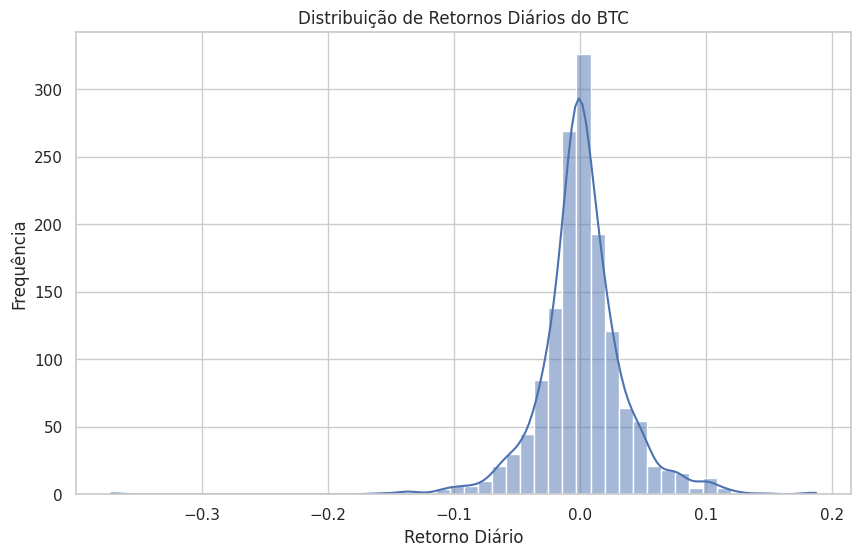

In [5]:
# Calculando os retornos diários
btc_data['Daily_Return'] = btc_data['Close'].pct_change()

plt.figure(figsize=(10, 6))
sns.histplot(btc_data['Daily_Return'].dropna(), bins=50, kde=True)
plt.title('Distribuição de Retornos Diários do BTC')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

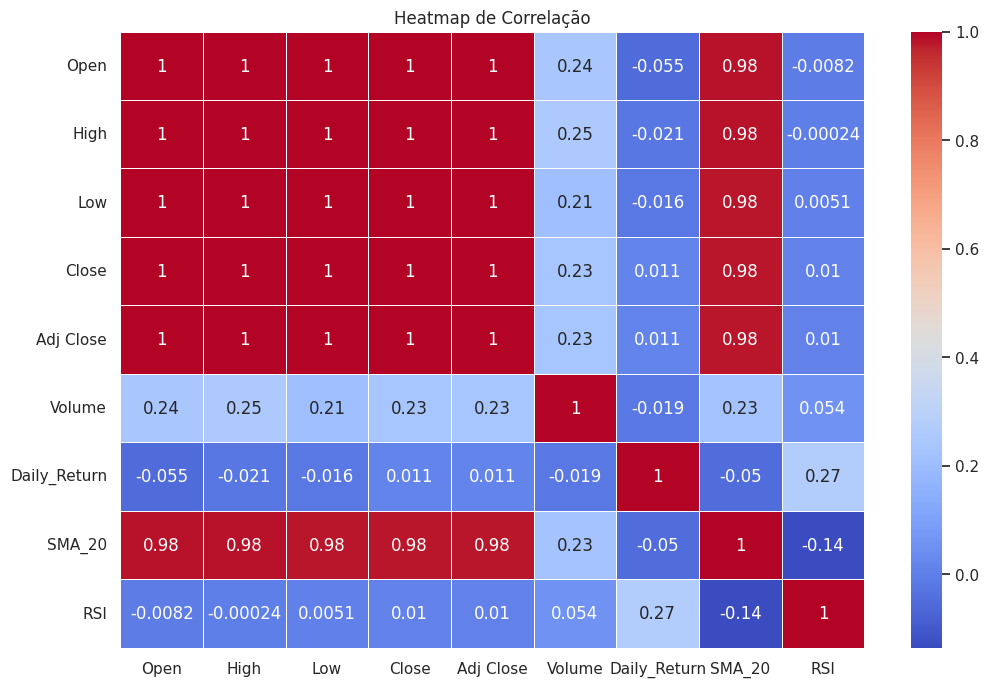

In [16]:
# Matriz de correlação
# Selecionando apenas as colunas numéricas para calcular a correlação
numeric_columns = btc_data.select_dtypes(include=[np.number])

# Matriz de correlação
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlação')
plt.show()


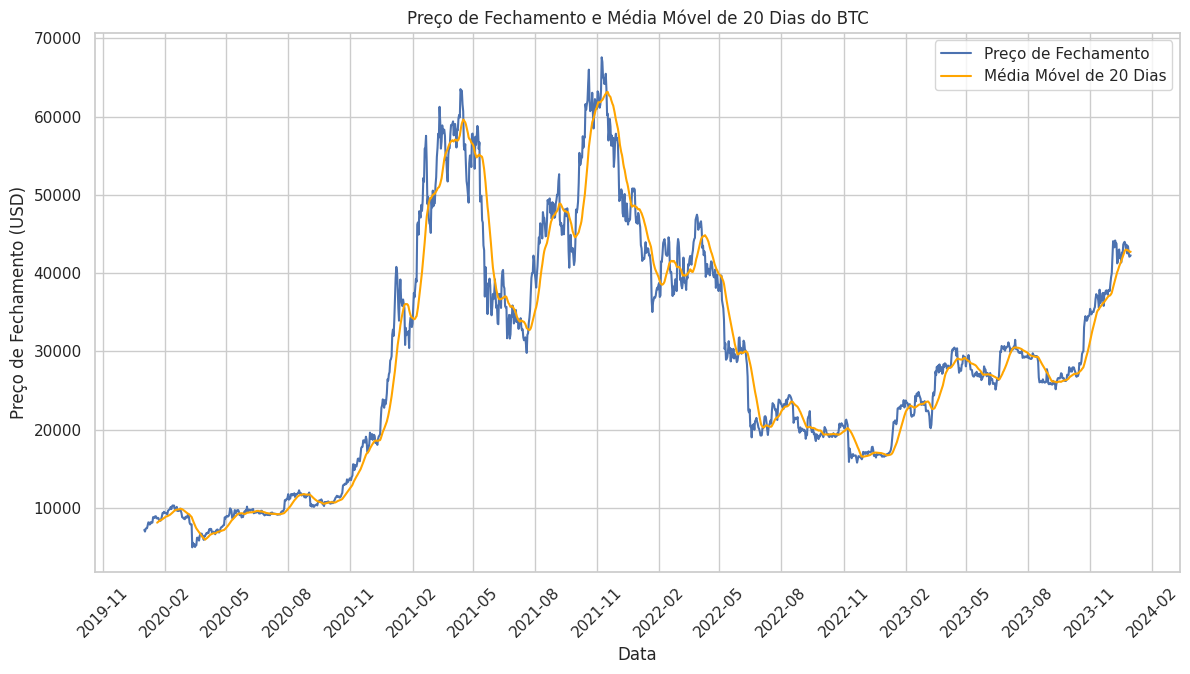

In [20]:
# Converter a coluna 'Date' para o tipo datetime
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

# Calculando a Média Móvel de 20 dias
btc_data['SMA_20'] = btc_data['Close'].rolling(window=20).mean()

# Plotando as Médias Móveis
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Date'], btc_data['Close'], label='Preço de Fechamento')
plt.plot(btc_data['Date'], btc_data['SMA_20'], label='Média Móvel de 20 Dias', color='orange')

# Rotacionar os rótulos das datas
plt.xticks(rotation=45)

# Definir o formato da data para exibição
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Mostrar rótulos a cada 3 meses
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formatar rótulo como 'Ano-Mês'

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.title('Preço de Fechamento e Média Móvel de 20 Dias do BTC')
plt.legend()
plt.show()

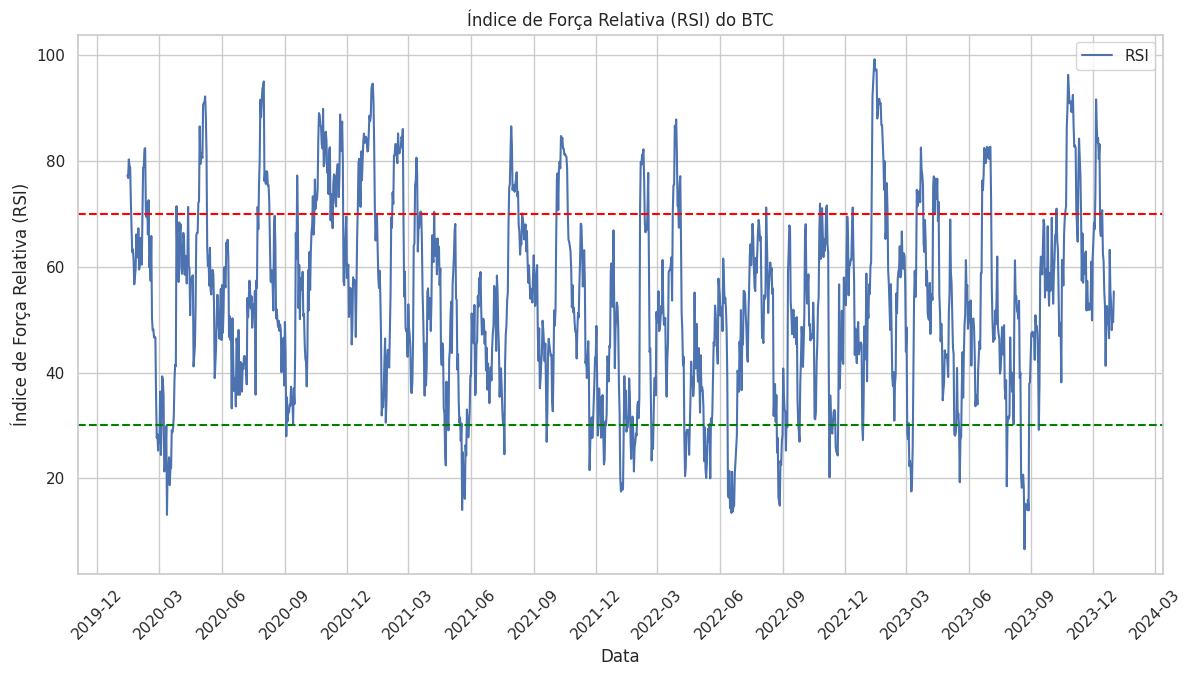

In [21]:
# Converter a coluna 'Date' para o tipo datetime
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

# Função para calcular o RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculando o RSI
btc_data['RSI'] = calculate_rsi(btc_data)

# Plotando o RSI
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Date'], btc_data['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')

# Rotacionar os rótulos das datas
plt.xticks(rotation=45)

# Definir o formato da data para exibição
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Mostrar rótulos a cada 3 meses
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formatar rótulo como 'Ano-Mês'

plt.xlabel('Data')
plt.ylabel('Índice de Força Relativa (RSI)')
plt.title('Índice de Força Relativa (RSI) do BTC')
plt.legend()
plt.show()


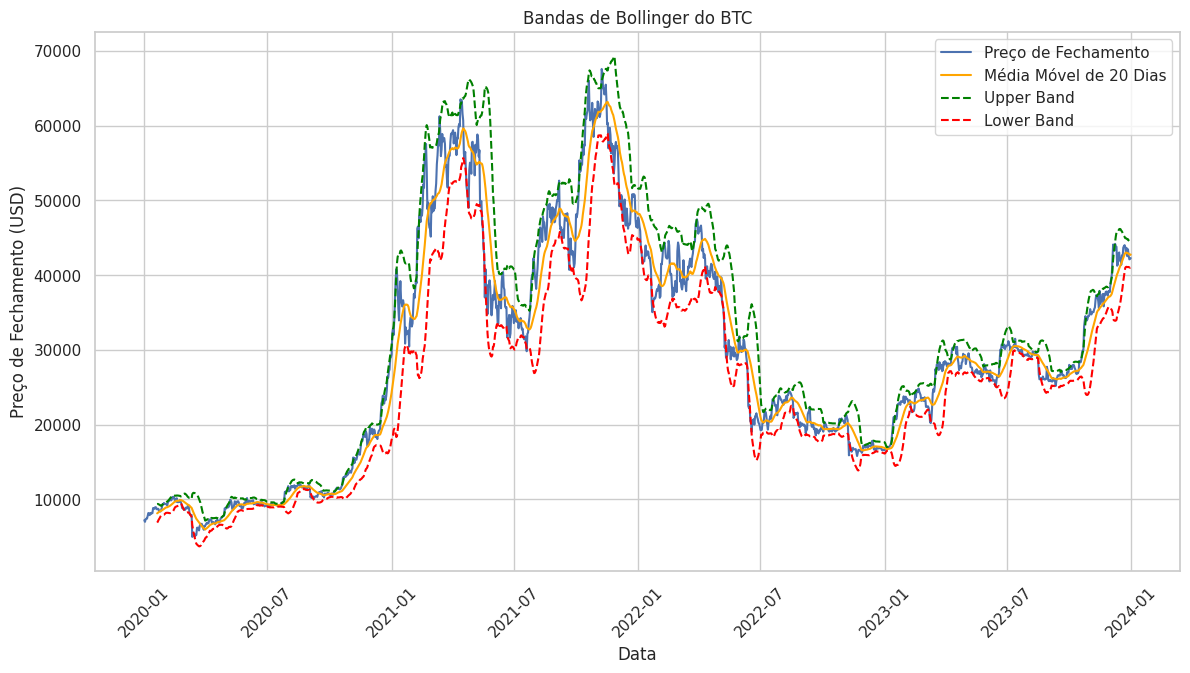

In [27]:
# Calculando as Bandas de Bollinger para BTC
btc_data['SMA_20'] = btc_data['Close'].rolling(window=20).mean()
btc_data['Upper_Band'] = btc_data['SMA_20'] + (btc_data['Close'].rolling(window=20).std() * 2)
btc_data['Lower_Band'] = btc_data['SMA_20'] - (btc_data['Close'].rolling(window=20).std() * 2)

# Plotando as Bandas de Bollinger para BTC
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Date'], btc_data['Close'], label='Preço de Fechamento')
plt.plot(btc_data['Date'], btc_data['SMA_20'], label='Média Móvel de 20 Dias', color='orange')
plt.plot(btc_data['Date'], btc_data['Upper_Band'], label='Upper Band', color='green', linestyle='--')
plt.plot(btc_data['Date'], btc_data['Lower_Band'], label='Lower Band', color='red', linestyle='--')

plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.title('Bandas de Bollinger do BTC')
plt.legend()
plt.show()

In [9]:
# Carregando dados históricos do ETH-USD
eth_data = pd.read_csv('../src/api/ETH-USD_historical_data.csv')

eth_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330
1,2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256
2,2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358
3,2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515
4,2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353


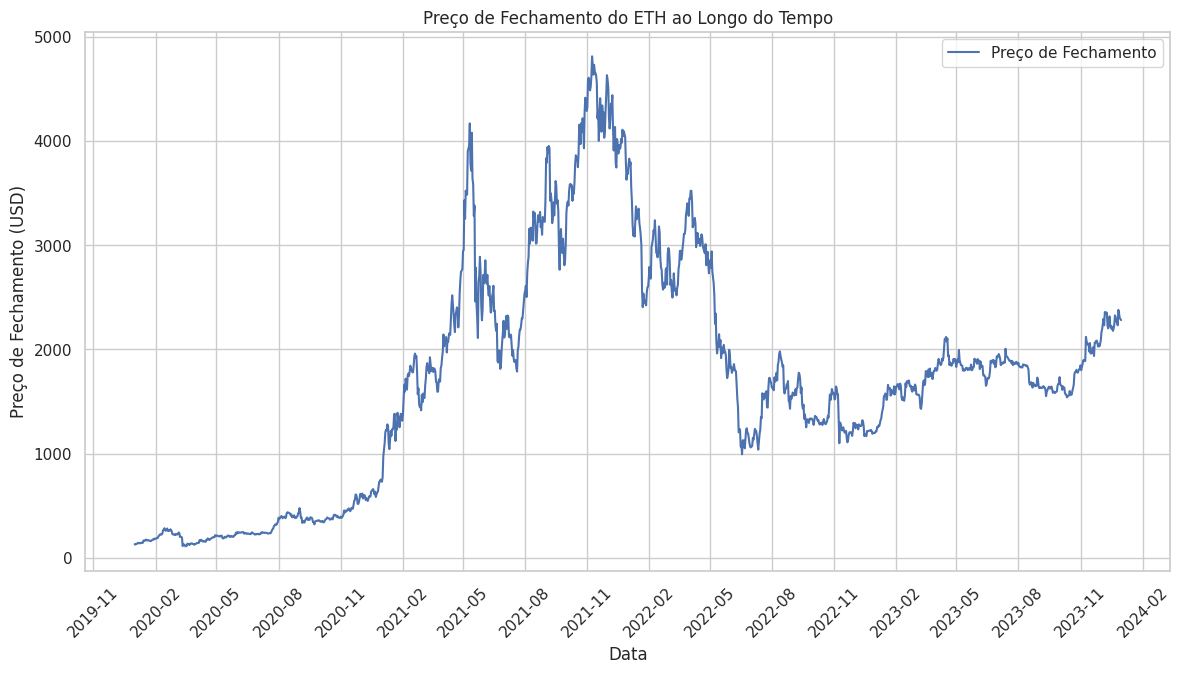

In [23]:
# Converter a coluna 'Date' para o tipo datetime
eth_data['Date'] = pd.to_datetime(eth_data['Date'])

# Plotando o Preço de Fechamento do Ethereum
plt.figure(figsize=(14, 7))
plt.plot(eth_data['Date'], eth_data['Close'], label='Preço de Fechamento')

# Rotacionar os rótulos das datas
plt.xticks(rotation=45)

# Definir o formato da data para exibição
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Mostrar rótulos a cada 3 meses
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formatar rótulo como 'Ano-Mês'

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.title('Preço de Fechamento do ETH ao Longo do Tempo')
plt.legend()
plt.show()

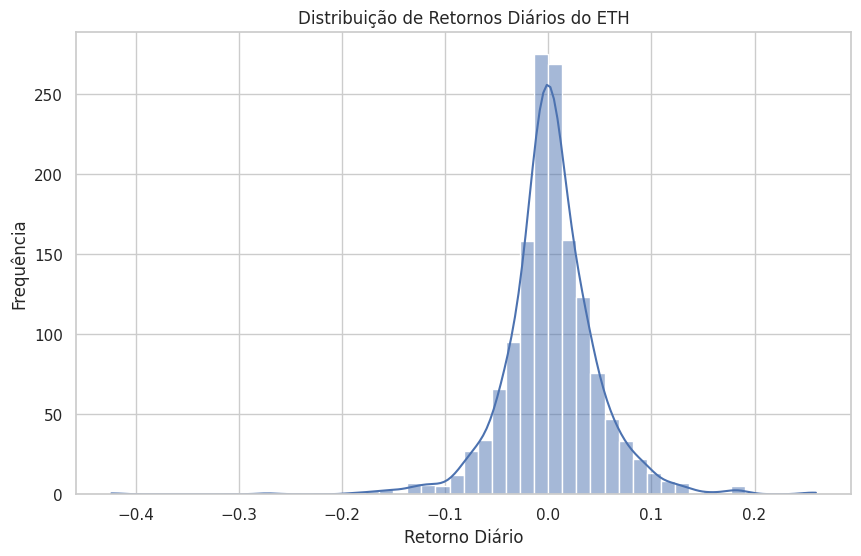

In [11]:
# Calculando os retornos diários
eth_data['Daily_Return'] = eth_data['Close'].pct_change()

plt.figure(figsize=(10, 6))
sns.histplot(eth_data['Daily_Return'].dropna(), bins=50, kde=True)
plt.title('Distribuição de Retornos Diários do ETH')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

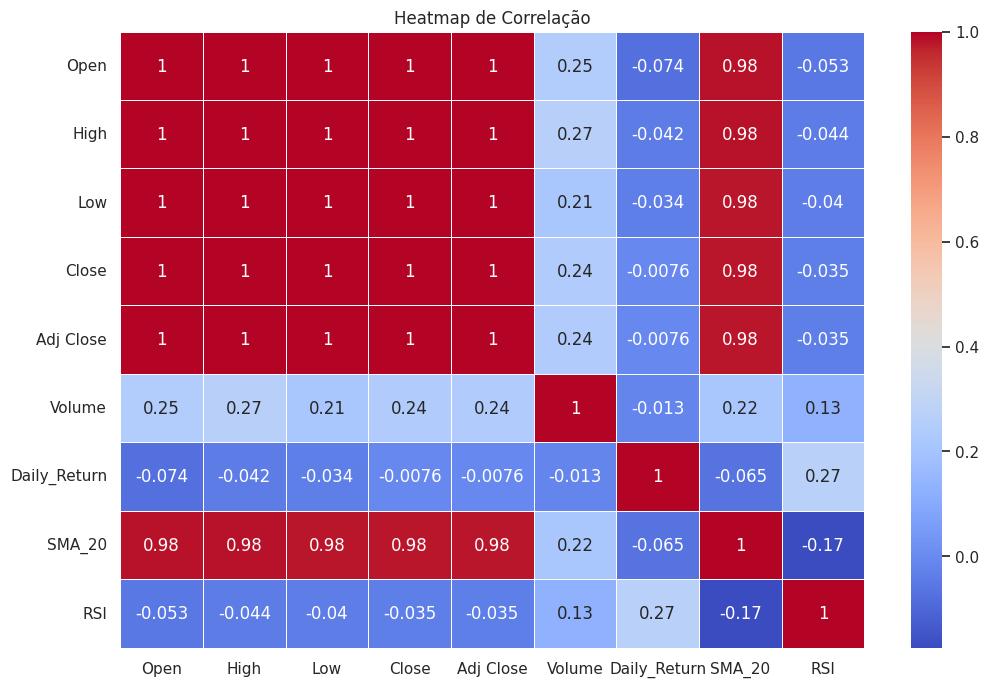

In [15]:
# Matriz de correlação
# Selecionando apenas as colunas numéricas para calcular a correlação
numeric_columns = eth_data.select_dtypes(include=[np.number])

# Matriz de correlação
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlação')
plt.show()


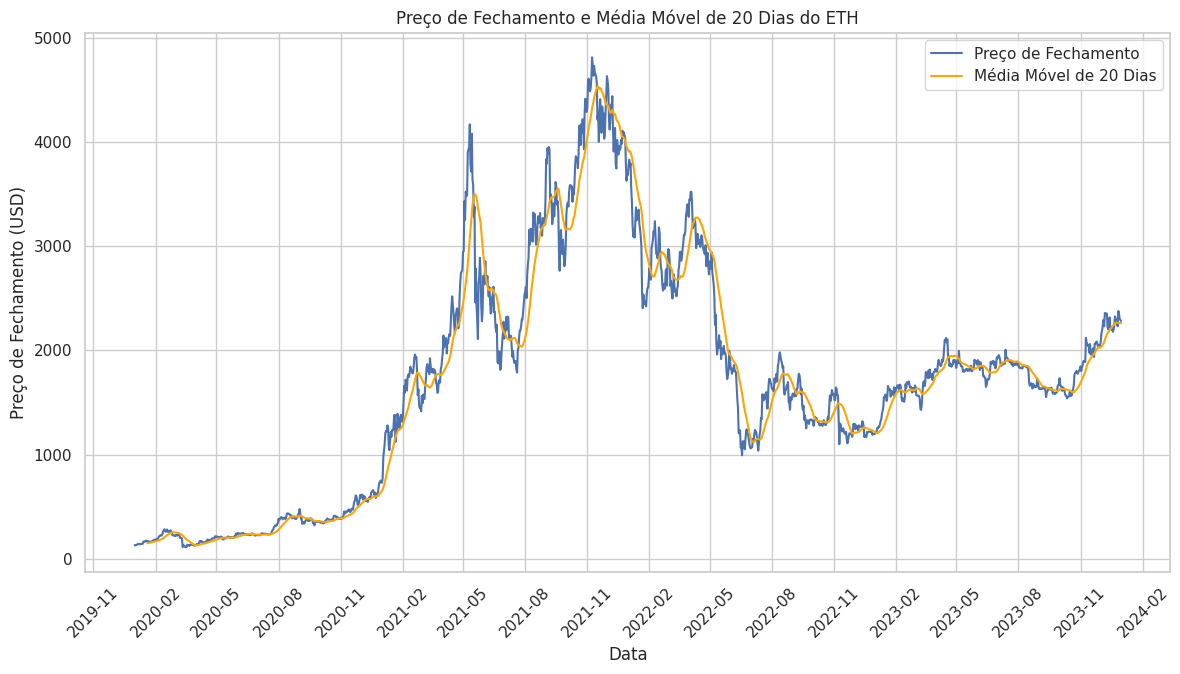

In [24]:

# Converter a coluna 'Date' para o tipo datetime
eth_data['Date'] = pd.to_datetime(eth_data['Date'])

# Calculando a Média Móvel de 20 dias
eth_data['SMA_20'] = eth_data['Close'].rolling(window=20).mean()

# Plotando as Médias Móveis
plt.figure(figsize=(14, 7))
plt.plot(eth_data['Date'], eth_data['Close'], label='Preço de Fechamento')
plt.plot(eth_data['Date'], eth_data['SMA_20'], label='Média Móvel de 20 Dias', color='orange')

# Rotacionar os rótulos das datas
plt.xticks(rotation=45)

# Definir o formato da data para exibição
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Mostrar rótulos a cada 3 meses
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formatar rótulo como 'Ano-Mês'

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.title('Preço de Fechamento e Média Móvel de 20 Dias do ETH')
plt.legend()
plt.show()

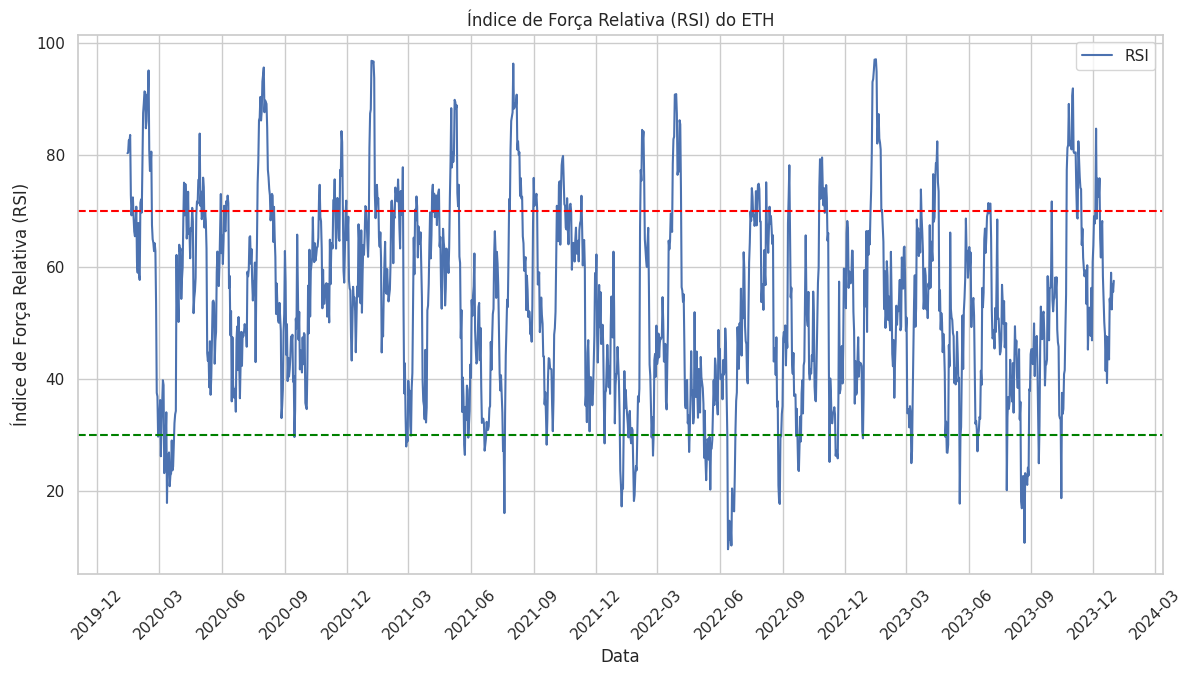

In [25]:
# Converter a coluna 'Date' para o tipo datetime
eth_data['Date'] = pd.to_datetime(eth_data['Date'])

# Função para calcular o RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculando o RSI
eth_data['RSI'] = calculate_rsi(eth_data)

# Plotando o RSI
plt.figure(figsize=(14, 7))
plt.plot(eth_data['Date'], eth_data['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')

# Rotacionar os rótulos das datas
plt.xticks(rotation=45)

# Definir o formato da data para exibição
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Mostrar rótulos a cada 3 meses
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formatar rótulo como 'Ano-Mês'

plt.xlabel('Data')
plt.ylabel('Índice de Força Relativa (RSI)')
plt.title('Índice de Força Relativa (RSI) do ETH')
plt.legend()
plt.show()

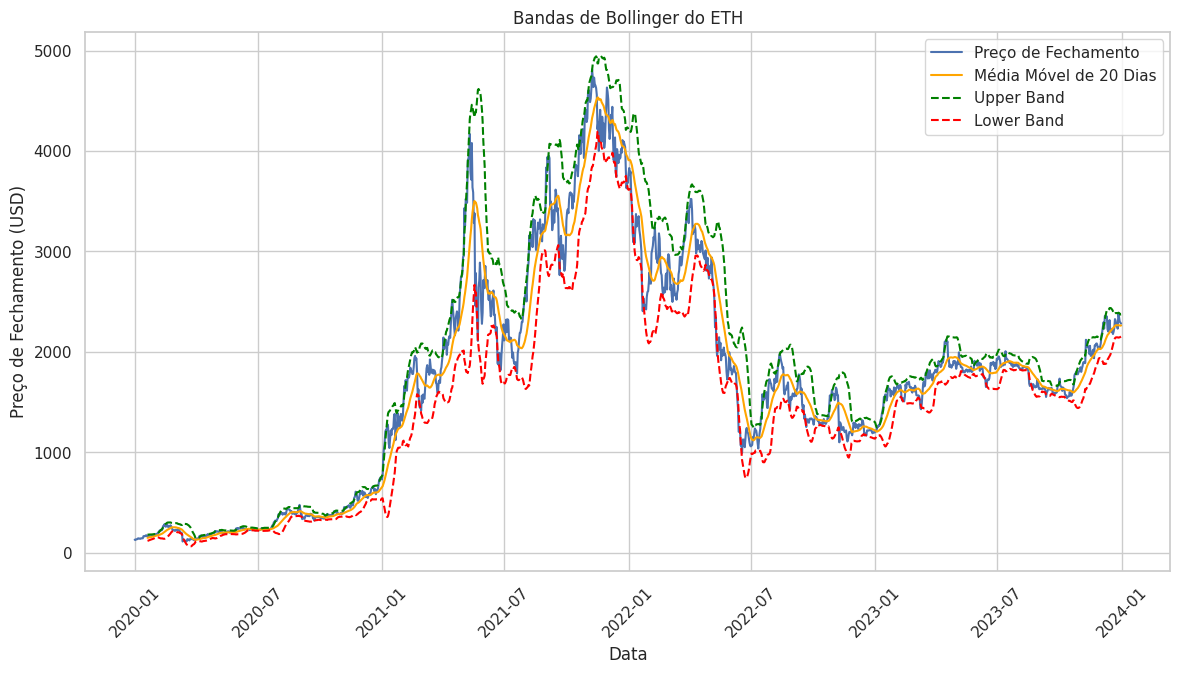

In [28]:

# Calculando as Bandas de Bollinger para ETH
eth_data['SMA_20'] = eth_data['Close'].rolling(window=20).mean()
eth_data['Upper_Band'] = eth_data['SMA_20'] + (eth_data['Close'].rolling(window=20).std() * 2)
eth_data['Lower_Band'] = eth_data['SMA_20'] - (eth_data['Close'].rolling(window=20).std() * 2)

# Plotando as Bandas de Bollinger para ETH
plt.figure(figsize=(14, 7))
plt.plot(eth_data['Date'], eth_data['Close'], label='Preço de Fechamento')
plt.plot(eth_data['Date'], eth_data['SMA_20'], label='Média Móvel de 20 Dias', color='orange')
plt.plot(eth_data['Date'], eth_data['Upper_Band'], label='Upper Band', color='green', linestyle='--')
plt.plot(eth_data['Date'], eth_data['Lower_Band'], label='Lower Band', color='red', linestyle='--')

plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.title('Bandas de Bollinger do ETH')
plt.legend()
plt.show()